In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import VBBinaryLensing
import sys
sys.path.append("/Users/anything/THU/astro/softwares/aeroastro/gravlen/critical_and_caustics/pys")
from utils import *

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

In [2]:
# Initialize VBBinaryLensing() class object, set relative accuracy
VBBL = VBBinaryLensing.VBBinaryLensing()
VBBL.RelTol = 1e-03

In [3]:
# 40
# t  =  np.linspace(7120, 7200, 500)
# s = 0.7982 # separation between the two lenses in units of total ang. Einstein radii
# q = 0.01098 # mass ratio: mass of the lens on the right divided by mass of the lens on the left
# rho = 2.96*10**(-4) # source radius in Einstein radii of the total mass.
# alpha = np.pi-4.5462 # angle between lens axis and source trajectory
# tE = 37.53 # einstein radius crossing time
# t0 = 7100+65.223 # time of peak magnification
# u0 = -0.0568 # impact parameter

# 67
t  =  np.linspace(0, 60, 500)
s = 1.610 # separation between the two lenses in units of total ang. Einstein radii
q = 7.6*10**(-5) # mass ratio: mass of the lens on the right divided by mass of the lens on the left
rho = 0.0096 # source radius in Einstein radii of the total mass.
alpha = 2.756 # angle between lens axis and source trajectory
tE = 11.03 # einstein radius crossing time
t0 = 31.231 # time of peak magnification
u0 = 0.359 # impact parameter

# 17_OGLE2003235_sol
# t  =  np.linspace(2800, 2900, 500)
# s = 1.120 # separation between the two lenses in units of total ang. Einstein radii
# q = 0.0039 # mass ratio: mass of the lens on the right divided by mass of the lens on the left
# rho = 0.00096 # source radius in Einstein radii of the total mass.
# alpha = -223.8/180*np.pi+2*np.pi/2 # angle between lens axis and source trajectory
# tE = 61.5 # einstein radius crossing time
# t0 = 2848.06 # time of peak magnification
# u0 = -0.133 # impact parameter

# t  =  np.linspace(7000, 7300, 500)

# s = 1 # separation between the two lenses in units of total ang. Einstein radii
# q = 0.5 # mass ratio: mass of the lens on the right divided by mass of the lens on the left
# rho = 0.01 # source radius in Einstein radii of the total mass.
# alpha = 0.93 # angle between lens axis and source trajectory
# tE = 100.3 # einstein radius crossing time
# t0 = 7154. # time of peak magnification
# u0 = 0.3 # impact parameter

# Position of the center of the source with respect to the center of mass.
tau = (t - t0)/tE

# VBBinaryLensingLibrary.cpp
# 		y1s[i] = pr[2] * salpha - tn*calpha;
# 		y2s[i] = -pr[2] * calpha - tn*salpha;
# tn = (ts[i] - pr[6]) * tE_inv;

# tau = (t - t0)/tE
# y1s[i] = u0*sin(alpha) - tau*cos(alpha)
# y2s[i] = -u0*cos(alpha) - tau*sin(alpha)

# so, this is wrong since the cpp source have this two lines:
y1 = -u0*np.sin(alpha) + tau*np.cos(alpha)
y2 = u0*np.cos(alpha) + tau*np.sin(alpha)

y1_me = u0*np.sin(alpha) - tau*np.cos(alpha)
y2_me = -u0*np.cos(alpha) - tau*np.sin(alpha)


mag = np.zeros(len(tau))

# Calculate the magnification at each time 
#?VBBL.BinaryLightCurve

params = [np.log(s), np.log(q), u0, alpha, np.log(rho), np.log(tE), t0]
# mag = VBBL.BinaryLightCurve(params, t, y1, y2)
mag = VBBL.BinaryLightCurve(params, t, y1_me, y2_me)
#VBBL.BinaryLightCurve called BinaryMag2(s, q, y1s[i], y2s[i], rho)

In [4]:
# Calculate the cirtical curves and the caustic curves
solutions = VBBL.PlotCrit(s, q) # Returns _sols object containing n crit. curves followed by n caustic curves
print(type(solutions))

<class 'VBBinaryLensing._sols'>


In [5]:
# generator function iterating over _sols, _curve, or _point objects 
# making use of the next keyword
def iterate_from(item):
    while item is not None:
        yield item
        item = item.next

curves = []
for curve in iterate_from(solutions.first):
    for point in iterate_from(curve.first):
        curves.append((point.x1, point.x2))
        
critical_curves = np.array(curves[:int(len(curves)/2)])
caustic_curves = np.array(curves[int(len(curves)/2):])

(-1, 1)

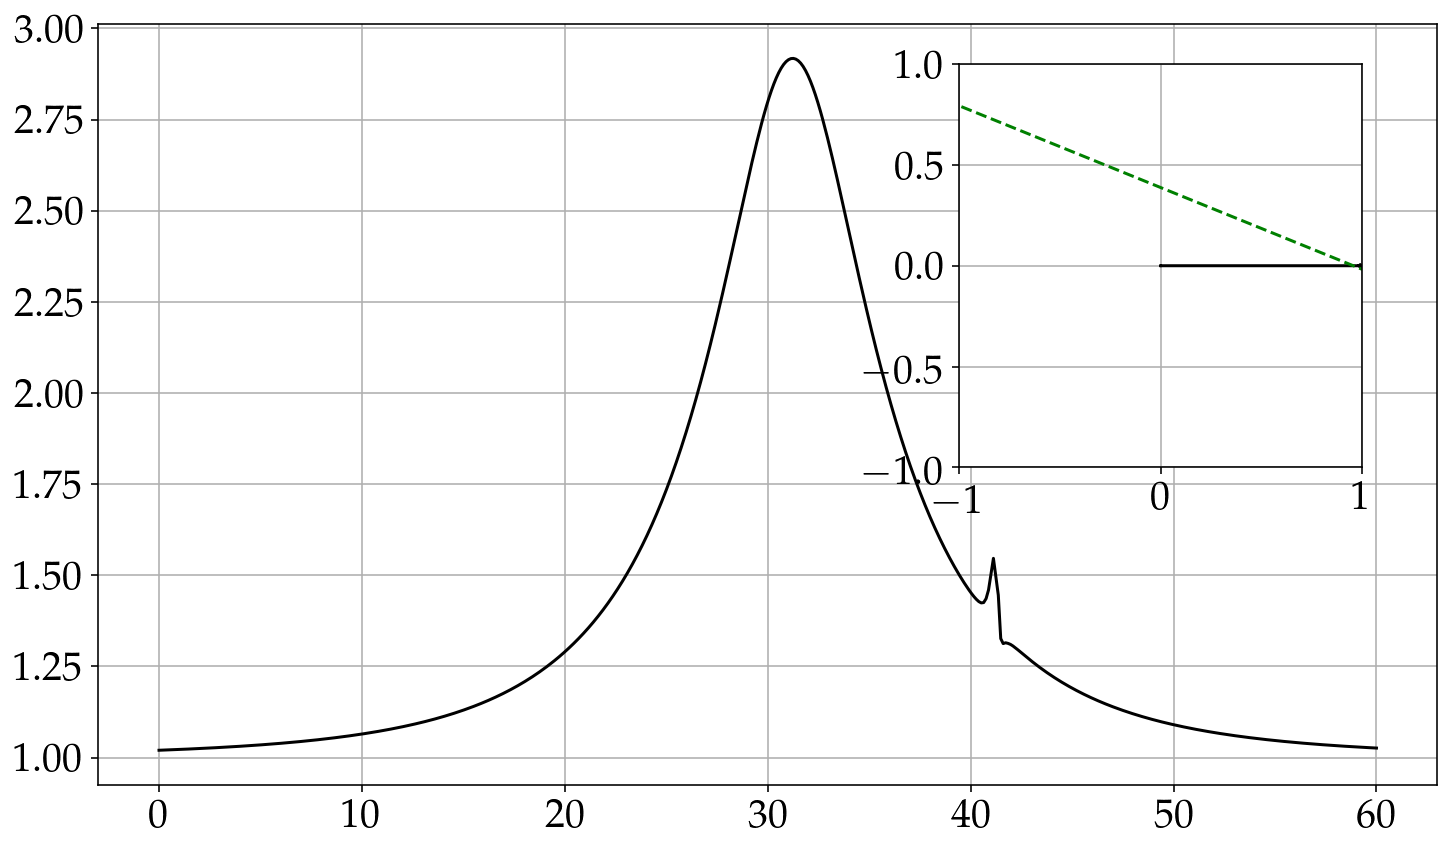

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(t, mag, 'k-')
ax.grid(True)
# ax.text(2800,8,"Generated (Close) using paras\n on TABLE1 \nby VBBinaryLensing lib",fontsize=20)
ax2 = fig.add_axes([.54, .44, .4, .4], aspect=1)
ax2.plot(caustic_curves[:, 0], caustic_curves[:, 1], 'k-')
# ax2.plot(y1, y2, 'k--')
ax2.plot(y1_me, y2_me, 'g--')
ax2.grid(True)
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)


In [41]:
fig.savefig("17_OGLE2003235_sol.png", format='png', bbox_inches='tight', dpi=600, pad_inches = 0)#
#17_OGLE2003235_sol, 67_OGLE2005390_sol, 40_OGLE20150954

In [121]:
idx = 15
# Mag = VBBL.BinaryMag2(s, q, y1_me[idx], y2_me[idx], rho)
Mag = VBBL.BinaryMag0(s, q, y1[idx], y2[idx])
print(Mag, mag[idx]) #1.1184850824283166 1.118485082428317
# Now is ok, using VBBL.BinaryMag2 can easily compute the Magnification
# at certain position (y1, y2)
# Then the magnification map can easily computed, just take the magnification
# value of a pixel's centre as the value of the pixel

1.1283942107497098 1.1164660398767146


In [122]:
xlim, ylim = (-2,2), (-2,2)
num = 4096
datatype = np.float32

ImgSize = (num, num)
thetax, thetay = genxy(xlim=xlim,ylim=ylim,num=num, datatype = datatype)
srcplanemag = np.zeros(thetax.shape)
srcplaneIMG = np.zeros(ImgSize).astype(datatype)

from tqdm import tqdm
with tqdm(total=len(thetax)) as pbar:
    for idx in range(len(thetax)):
        srcplanemag[idx] = VBBL.BinaryMag2(s, q, thetax[idx], thetay[idx], rho)
#         srcplanemag[idx] = VBBL.BinaryMag0(s, q, thetax[idx], thetay[idx]) #point source
        pbar.update(1)
srcplaneIMG = srcplanemag.reshape(ImgSize)

100%|██████████| 16777216/16777216 [02:37<00:00, 106364.92it/s]


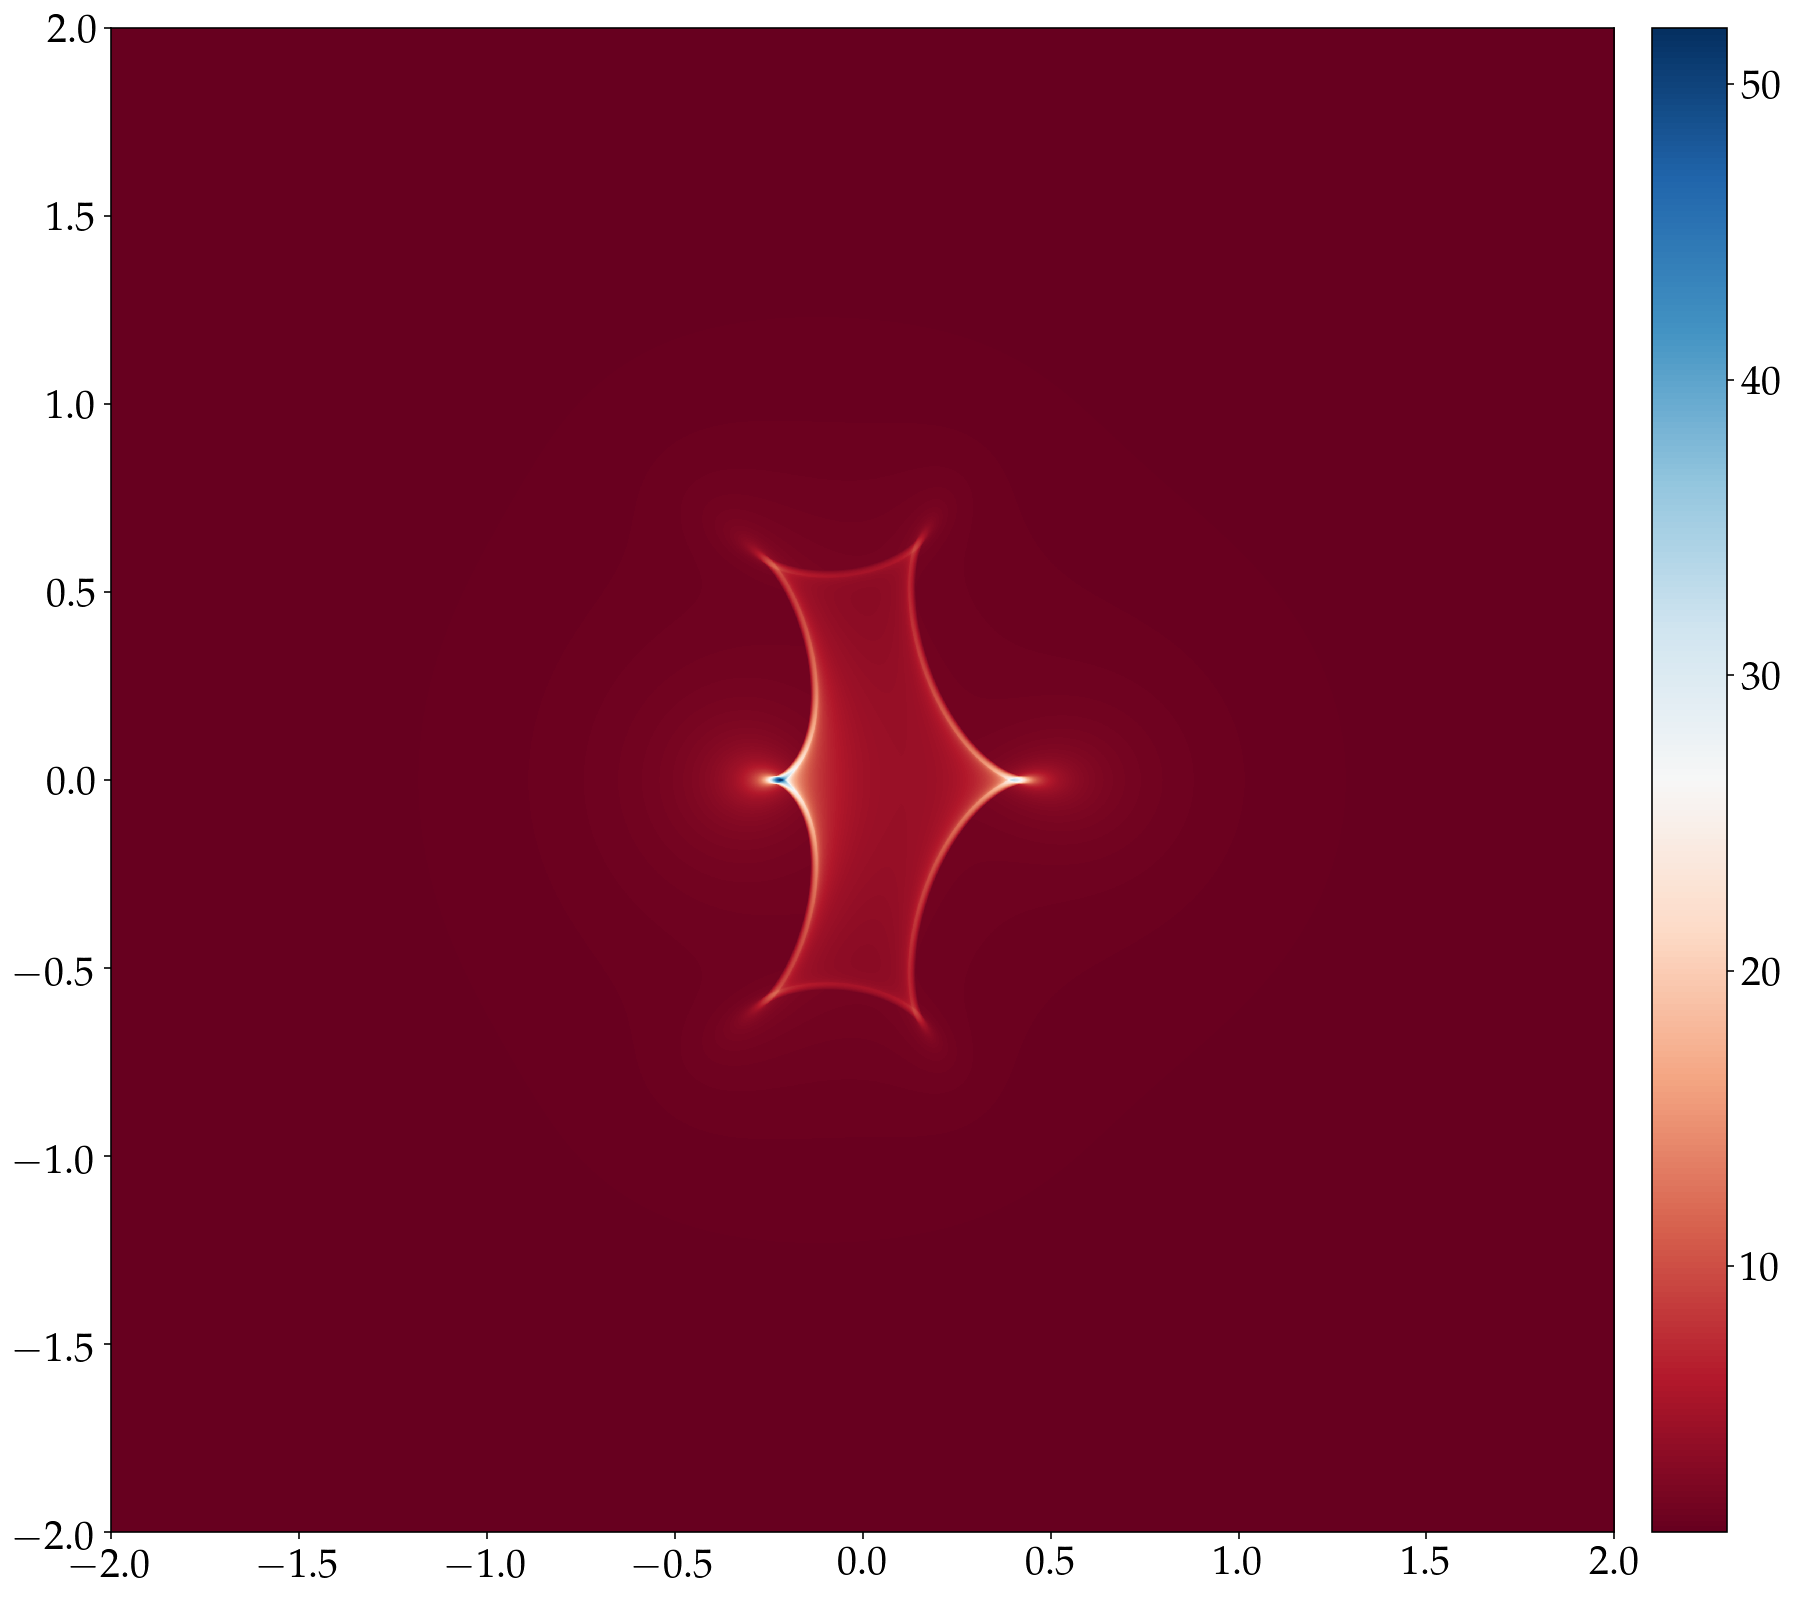

In [123]:
cmap = plt.cm.get_cmap('RdBu')#viridis, inferno, jet, RdBu, Blues
fig3 = plt.figure()
fig3.set_size_inches(20,12)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
plt.margins(0,0)
fig3img = plt.imshow(srcplaneIMG,origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig3img)
plt.show()

In [124]:
# # magnification map using inverse ray shooting
# from totahiti191210.two_pmnegq_inverse_ray_shoot_191210 import *

In [125]:
# # xs = np.array([-s, 0])

# # Actually the origin is taken at the centre of two point mass:
# xs = np.array([-q/(1+q), 1/(1+q)])*s
# ys = np.array([0,0])
# raynum = 30000
# masses = np.array([1/(1+q),q/(1+q)]) # smaller mass is at origin
# twolens = Nlenses(masses, xs, ys)

In [126]:
# finite source size
# 0.01/4*2048
psfsize = int(rho/(xlim[1]-xlim[0])*ImgSize[0])*2+1
print("psfsize",psfsize)
psf = np.zeros((psfsize, psfsize))

centre = (psfsize-1)/2
for ir in range(psfsize):
    for ic in range(psfsize):
        if (ir-centre)**2+(ic-centre)**2<=(psfsize/2)**2:
            psf[ir,ic]=1
# psf[2][4]=0
print(psf)
psf/=np.sum(psf)
from scipy import signal
# c_full = signal.convolve2d(I,Kernel,mode='full')

psfsize 21
[[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]

In [127]:
# srcplaneIMG_rayshoot, _, _ = twolens.get_imgs_lessmem_v2(ImgSize, xlim, ylim, raynum, datatype = datatype)

In [128]:
# fig2 = plt.figure()
# fig2.set_size_inches(20,12)
# plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
# plt.margins(0,0)
# fig2img = plt.imshow(np.log10(srcplaneIMG_rayshoot),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# add_colorbar(fig2img)
# plt.show()

In [129]:
# srcplaneIMG_rayshootNomag, _, _ = twolens.get_imgs_lessmem_v3(ImgSize, xlim, ylim, raynum, datatype = datatype)
srcplaneIMG_rayshootNomag = np.load("Ray30000ImgSize4096s1_0q0_5rho0_01.npy")

In [130]:
srcplaneIMG_rayshootNomag_psf = signal.convolve2d(srcplaneIMG_rayshootNomag,psf,mode='same')
# srcplaneIMG_rayshootNomag_psf = srcplaneIMG_rayshootNomag # point source

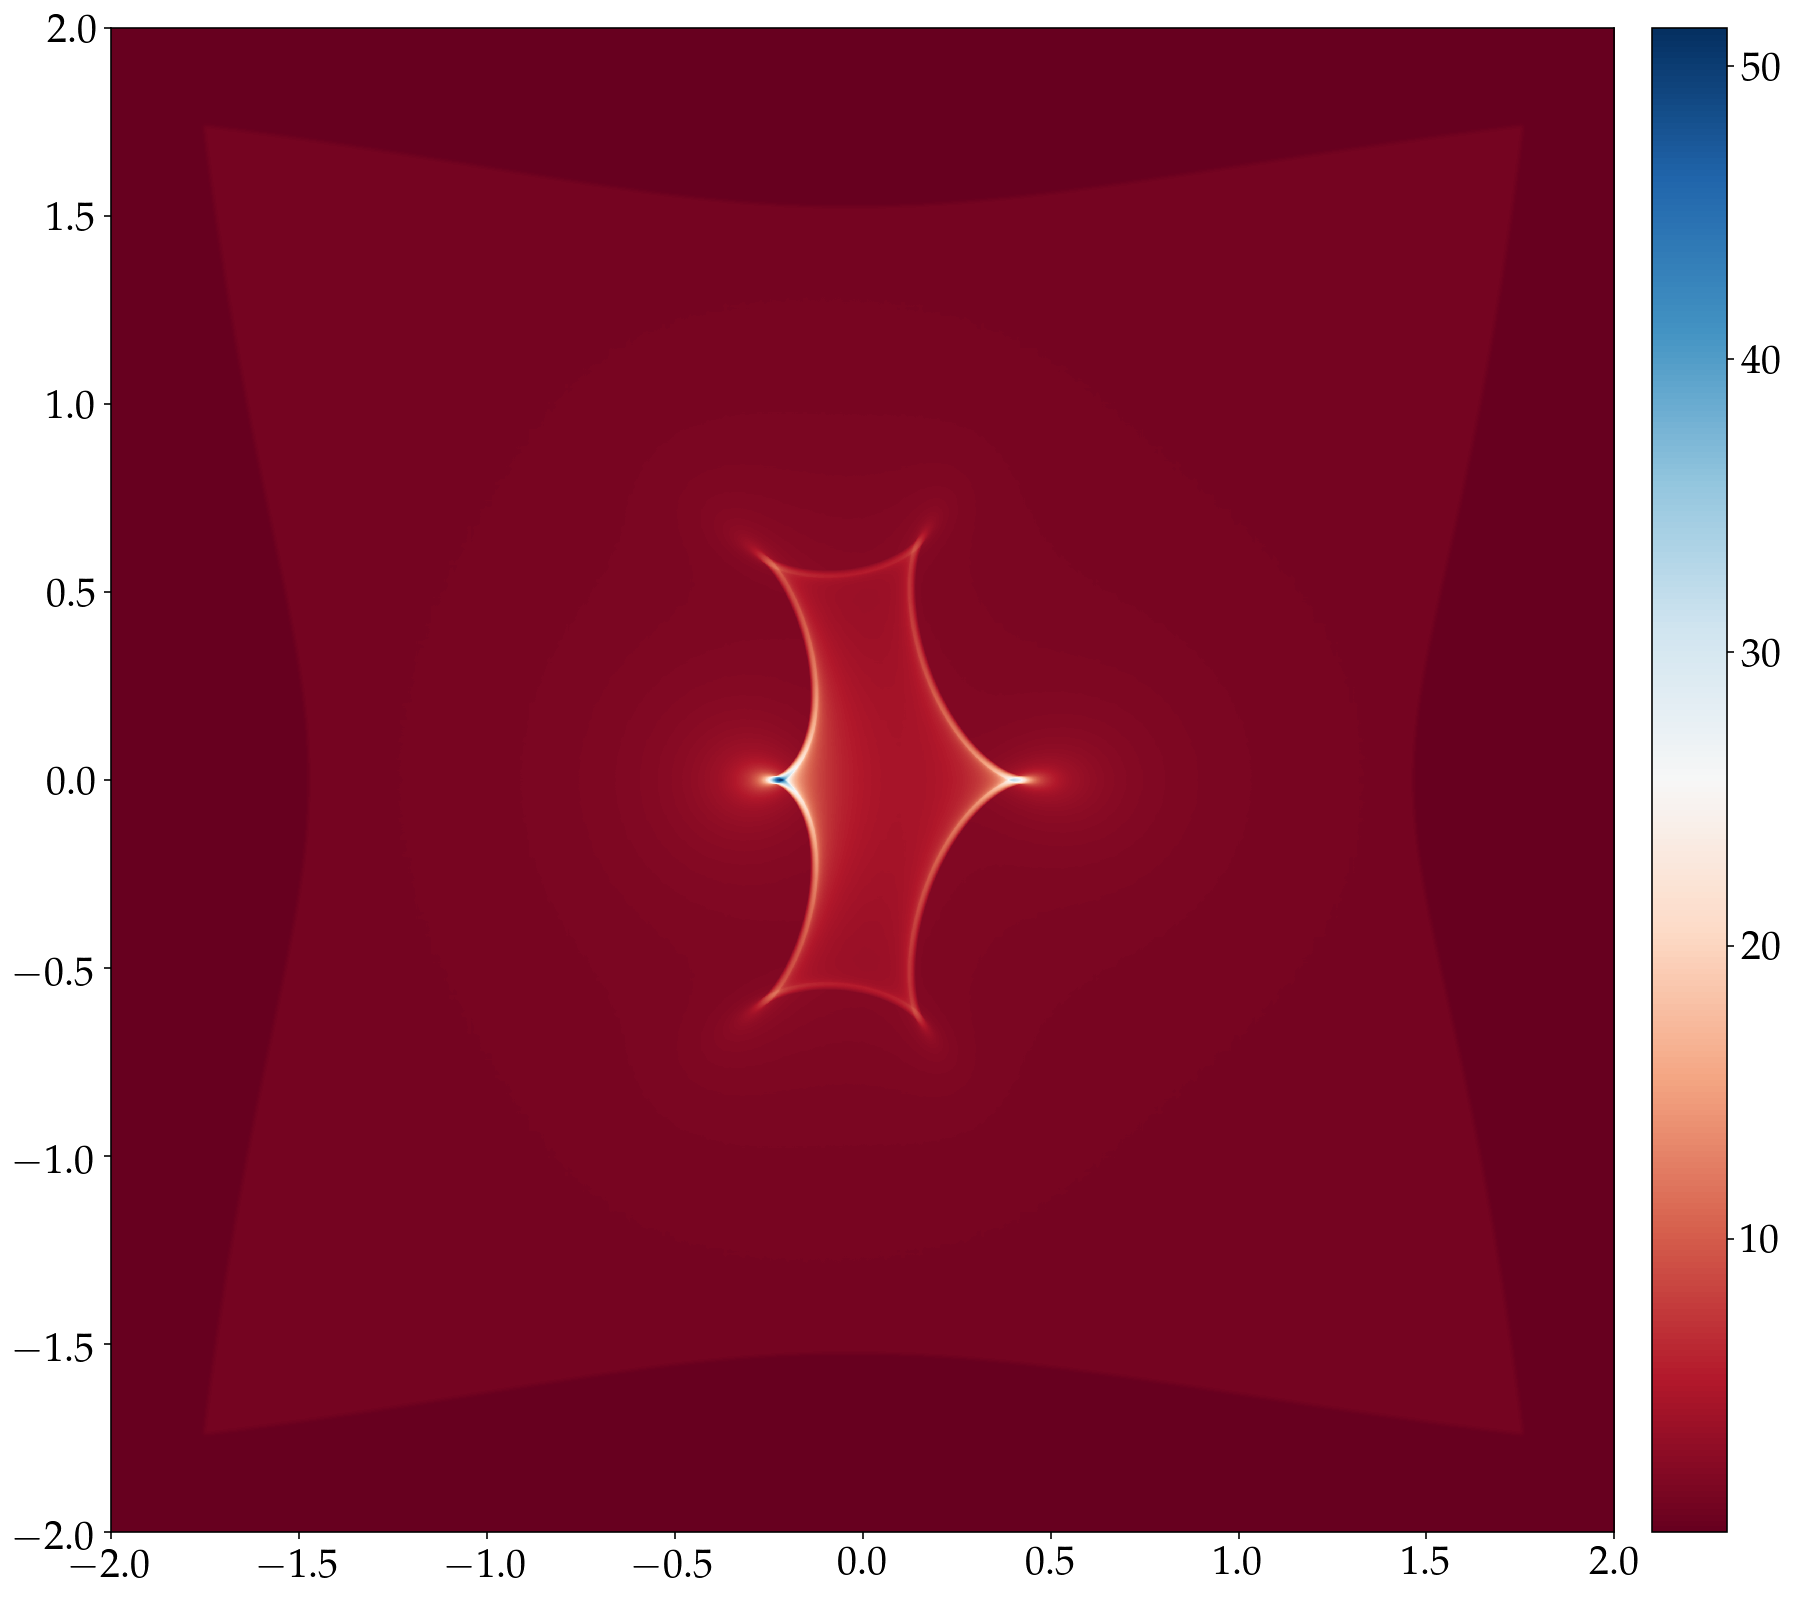

In [131]:
fig1 = plt.figure()
fig1.set_size_inches(20,12)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
plt.margins(0,0)
fig1img = plt.imshow((srcplaneIMG_rayshootNomag_psf),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig1img)
plt.show()

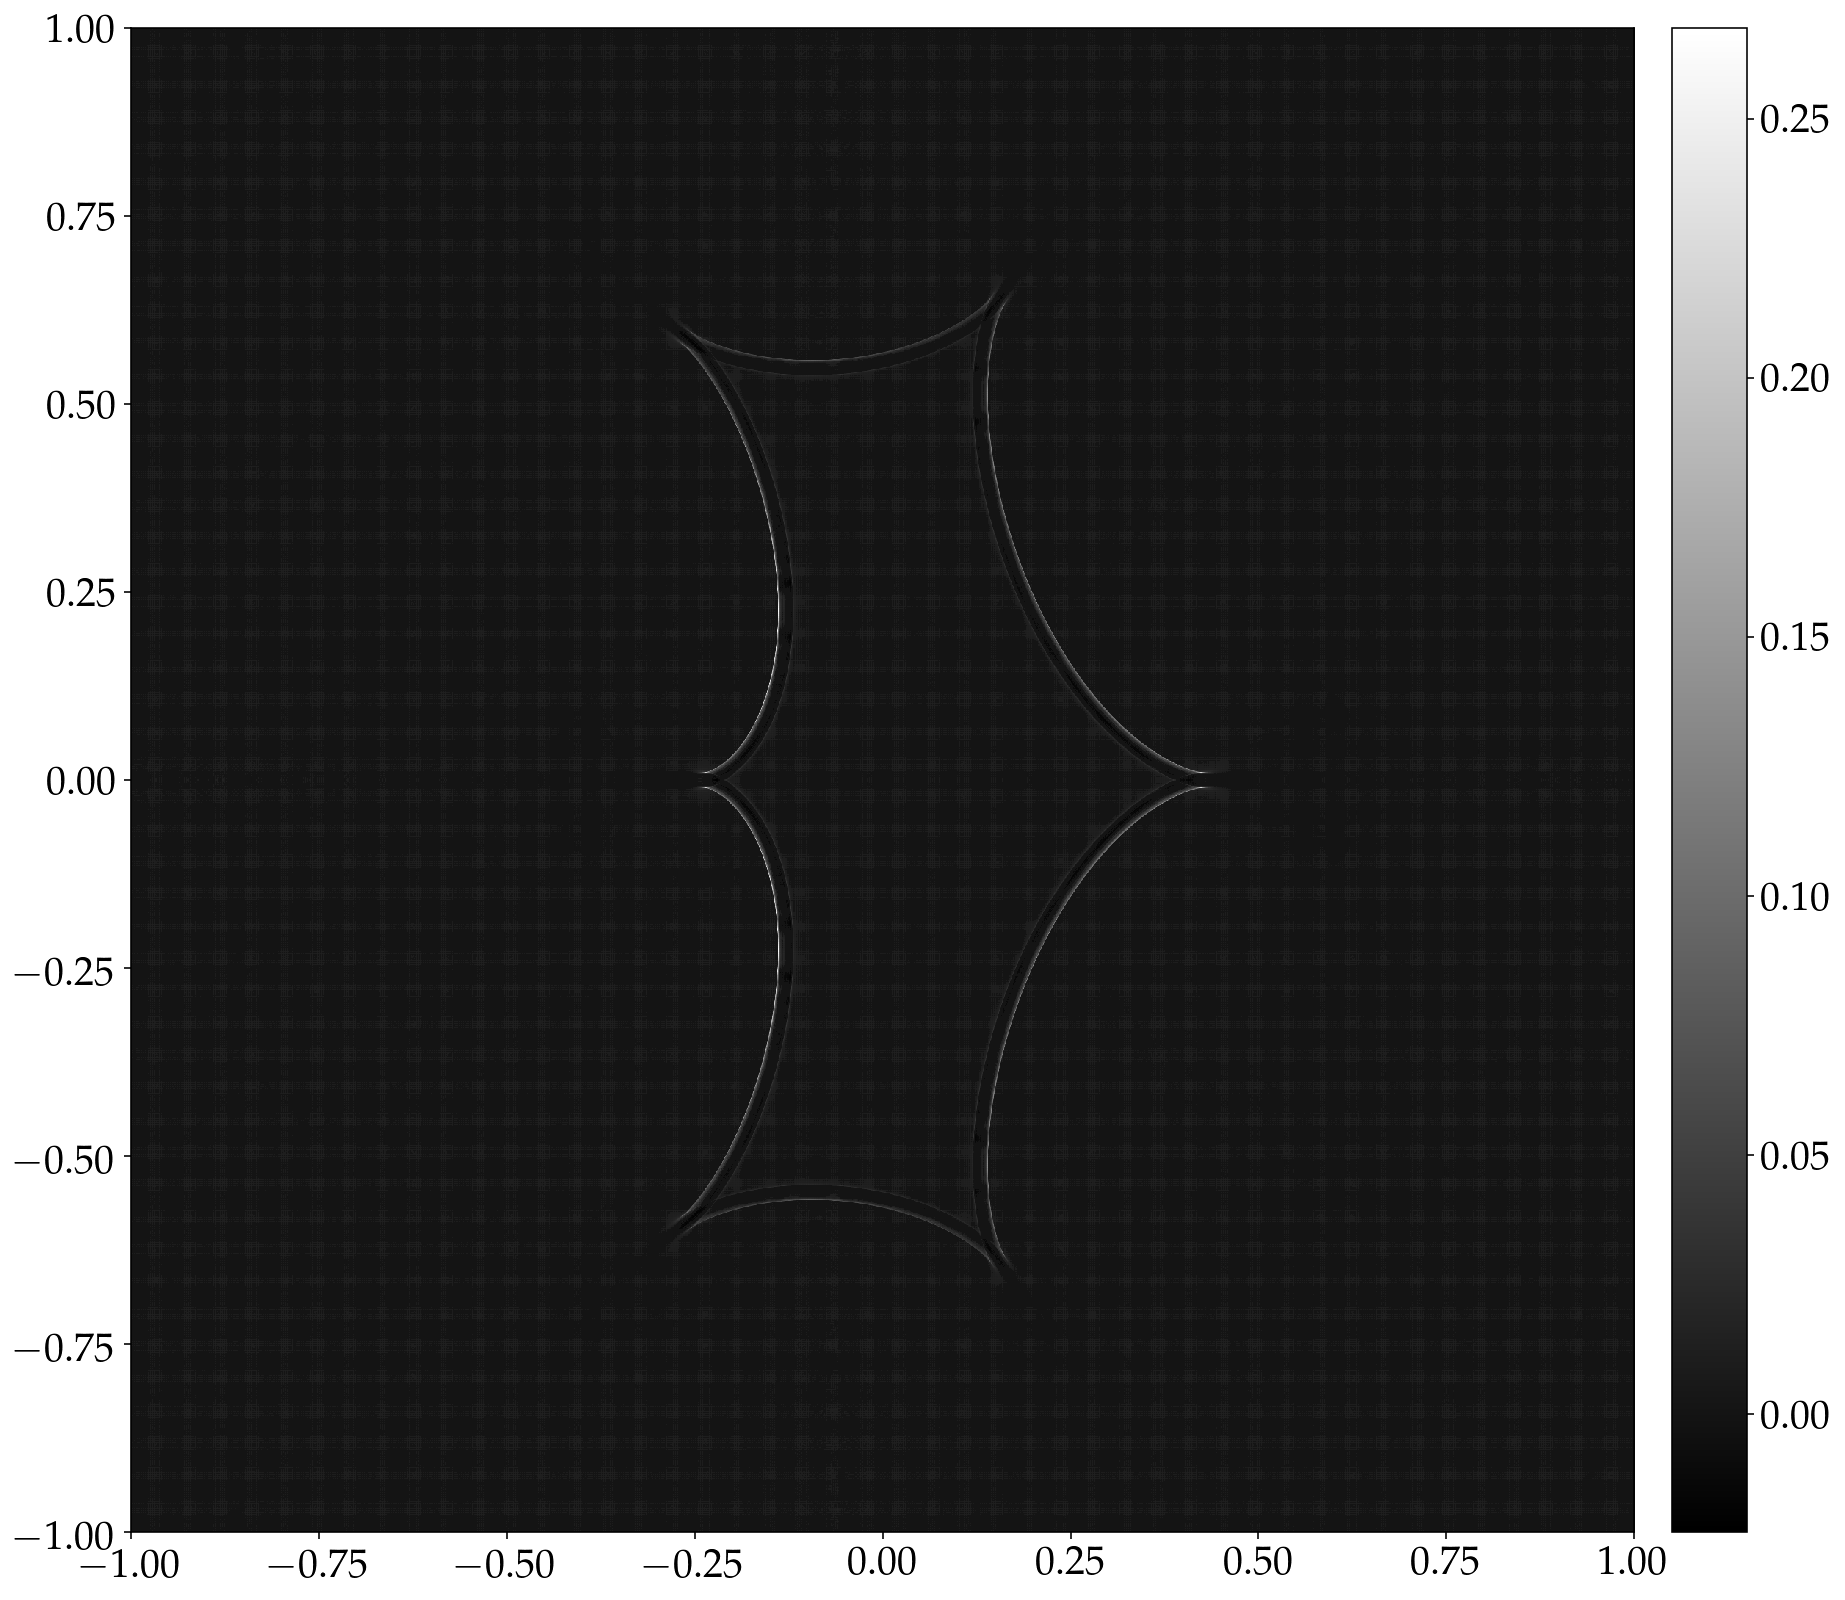

In [132]:
# see the difference between inverse ray shooting and Bozza's method:
diffimg = (srcplaneIMG_rayshootNomag_psf - srcplaneIMG)/srcplaneIMG

showratio = (0.25,0.75)
showimgrange = (int(num*showratio[0]),int(num*showratio[1]))
showxlim = (xlim[0]+showratio[0]*(xlim[1]-xlim[0]),xlim[0]+showratio[1]*(xlim[1]-xlim[0]))

showimg = diffimg[showimgrange[0]:showimgrange[1],showimgrange[0]:showimgrange[1]]
showimg[np.abs(showimg)<0.01]=0

fig0 = plt.figure()
fig0.set_size_inches(20,12)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
plt.margins(0,0)
# fig0img = plt.imshow(diffimg[showimgrange[0]:showimgrange[1],showimgrange[0]:showimgrange[1]],origin='lower',cmap=cmap, extent=[showxlim[0],showxlim[1],showxlim[0],showxlim[1]])
fig0img = plt.imshow(showimg,origin='lower',cmap=plt.get_cmap('gray'), extent=[showxlim[0],showxlim[1],showxlim[0],showxlim[1]])
add_colorbar(fig0img)
plt.show()

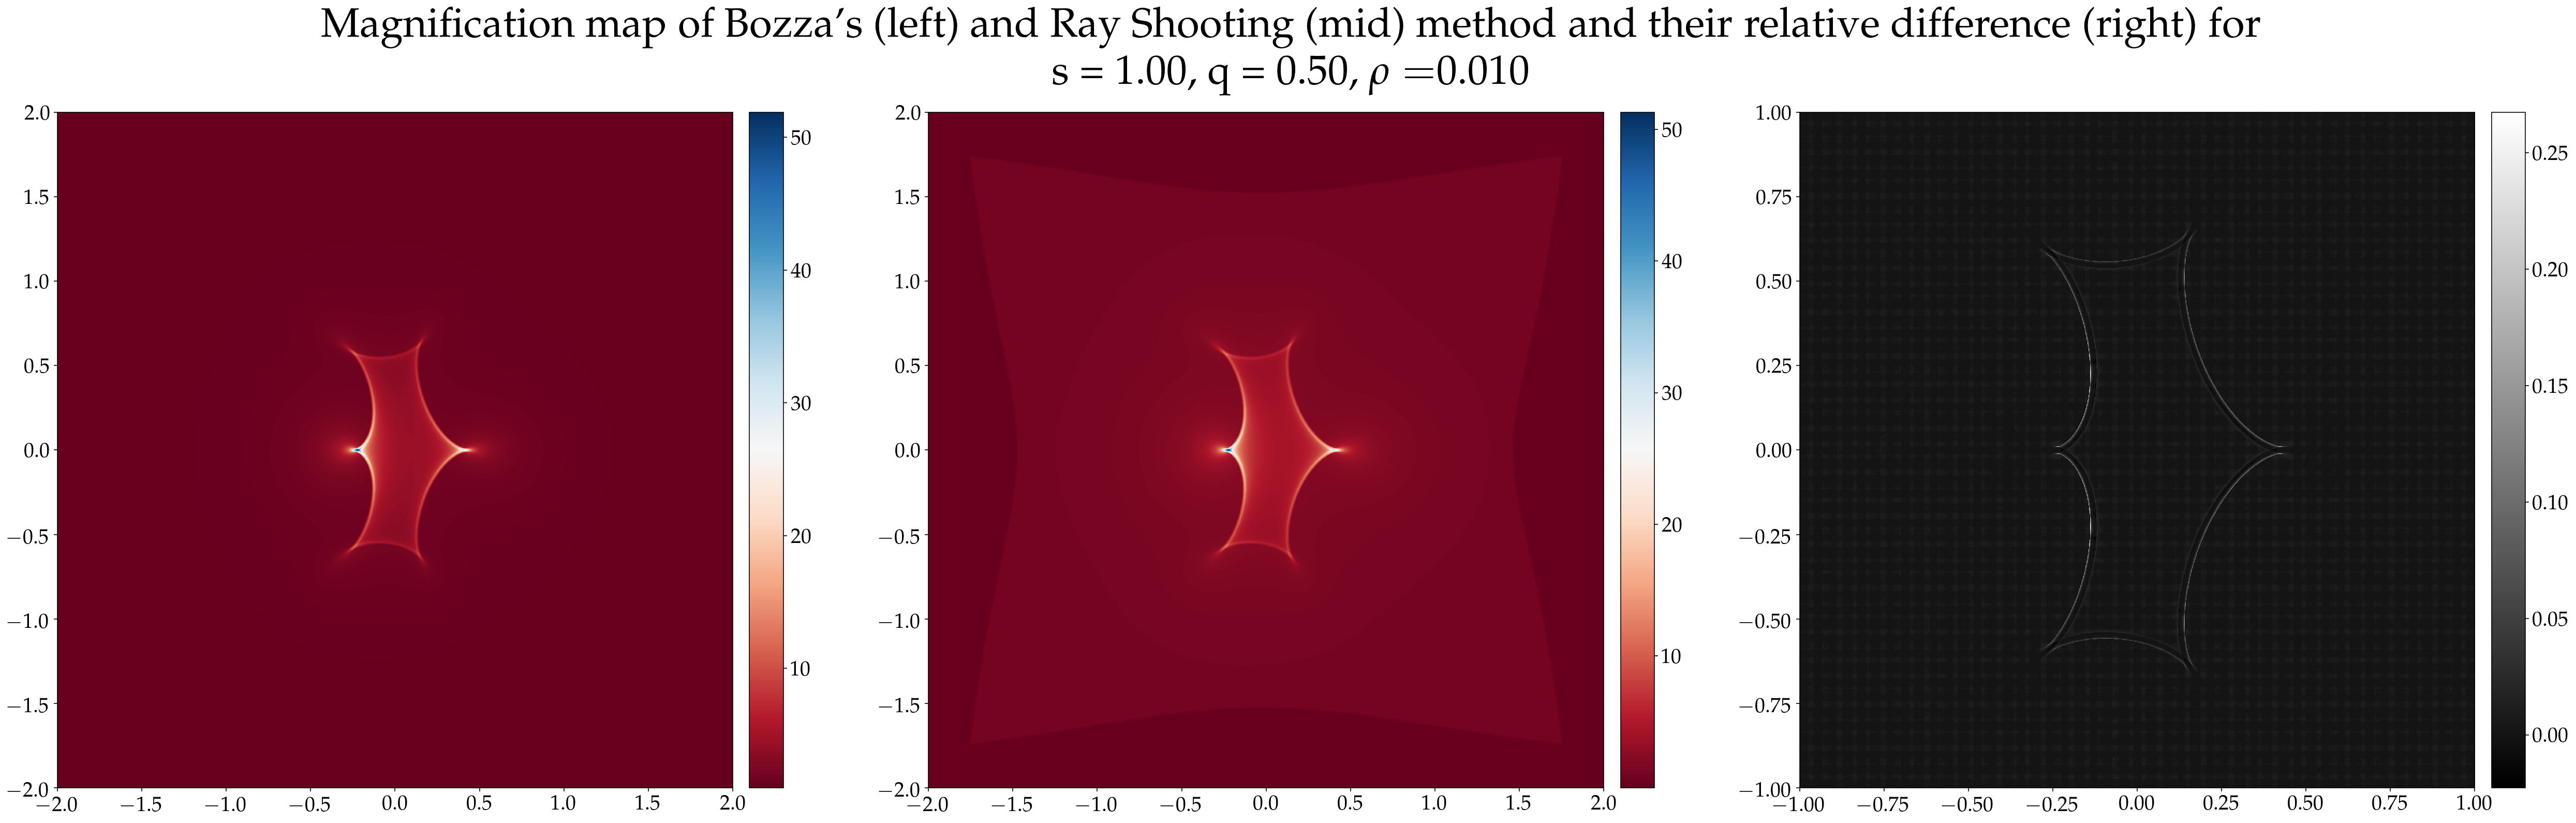

In [133]:
# cmap = plt.cm.get_cmap('jet')#viridis, inferno
fig = plt.figure()
fig.set_size_inches(36,12)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0.2, wspace = 0.2)
plt.margins(0,0)
title_fs="Magnification map of Bozza's (left) and Ray Shooting (mid) method and their relative difference (right) for \n"+r"s = {:.2f}, q = {:.2f}, $\rho = ${:.3f}".format(s,q,rho)
# title_ps="Magnification map of Bozza's (left) and Ray Shooting (mid) method and their difference (right) for \n"+r"s = {:.2f}, q = {:.2f}, $\rho = ${:.3f}".format(s,q,rho)
plt.suptitle(title_fs,fontsize=40)
plt.subplot(131)
fig0img = plt.imshow((srcplaneIMG),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig0img)
plt.subplot(132)
fig0img = plt.imshow((srcplaneIMG_rayshootNomag_psf),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig0img)
plt.subplot(133)
# fig0img = plt.imshow((diffimg),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
fig0img = plt.imshow(showimg,origin='lower',cmap=plt.get_cmap('gray'), extent=[showxlim[0],showxlim[1],showxlim[0],showxlim[1]])

add_colorbar(fig0img)

plt.show()

In [116]:
# title_png="Ray{}s{:.2f}q{:.2f}rho{:.3f}.png".format(raynum,s,q,rho)
# fig.savefig(title_png, format='png', bbox_inches='tight', dpi=300, pad_inches = 0)

In [180]:
# light curve
k = 0.5
b=-0.19
scale = 0.8
# x = np.linspace(int(xlim[0]*scale*ImgSize[1]), int(xlim[1]*scale*ImgSize[1]), int(xlim[1]*scale*ImgSize[1])-int(xlim[0]*scale*ImgSize[1]))
x = np.linspace(showxlim[0], showxlim[1], 1000)
y = k*x+b
px = (-y*(ImgSize[0]/(xlim[1]-xlim[0]))+(ImgSize[0]/2)).astype(np.int)
py = (x*(ImgSize[0]/(xlim[1]-xlim[0]))+(ImgSize[0]/2)).astype(np.int)
lcBozza = srcplaneIMG[px,py]
lcRayshoot = srcplaneIMG_rayshootNomag_psf[px,py]

In [181]:
# lcBozza.shape
# # showxlim[0]
# print(x.shape)
# print(lcBozza.shape)

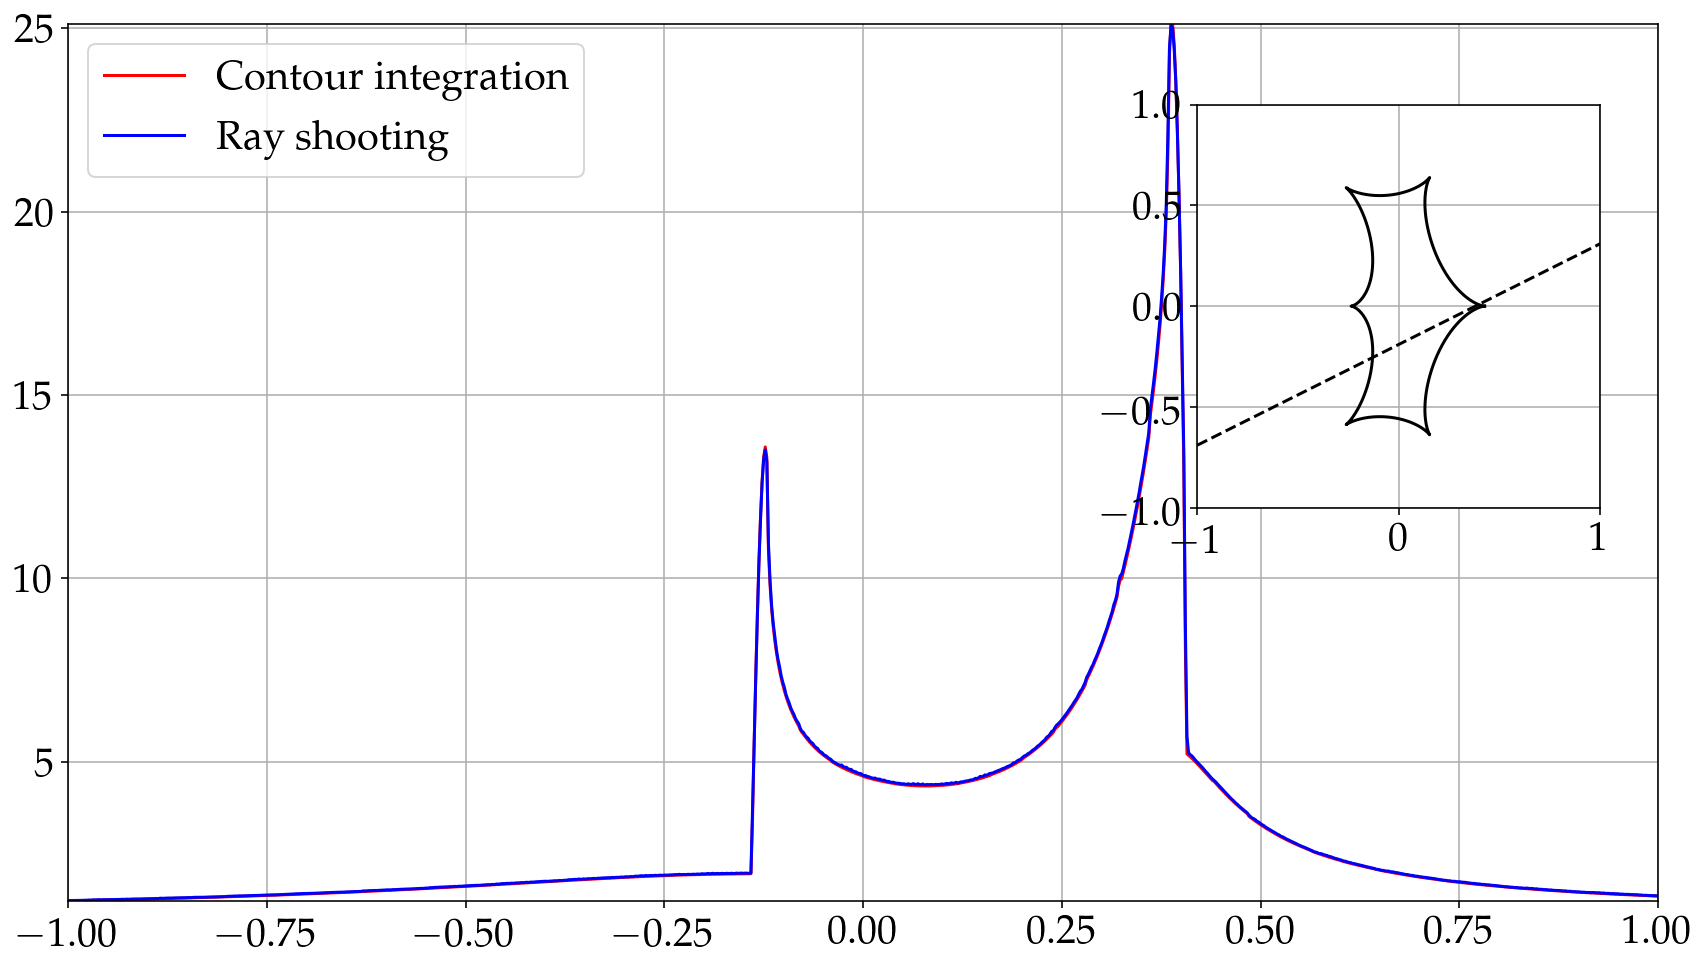

In [185]:
fig = plt.figure()
fig.set_size_inches(12,7)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0.2, wspace = 0.2)
plt.margins(0,0)
plt.plot(x, lcBozza, 'r-',label="Contour integration")
plt.plot(x, lcRayshoot, 'b-',label="Ray shooting")
plt.grid(True)
plt.legend(loc='upper left',fontsize=20)

ax2 = fig.add_axes([.61, .44, .4, .4], aspect=1)
ax2.plot(caustic_curves[:, 0], caustic_curves[:, 1], 'k-')
ax2.plot(x, y, 'k--')
# ax2.plot(y1_me, y2_me, 'g--')
ax2.grid(True)
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)

plt.show()
